# Homework 17 - Second order ODEs Daniel Teeuwsen

In [3]:
import numpy as np
import scipy.integrate
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

#### Excercise 1
The harmonic oscillator arises in many phyiscal problems.

1. Solve the harmonic oscillator problem,
$$\ddot{x}=-\omega^2x,$$

2. ...and solve the <a href="https://en.wikipedia.org/wiki/Anharmonicity">anharmonic oscillator</a> problem,
$$\ddot{x}=-\omega^2x^3,$$

3. ...and also solve the <a href="https://en.wikipedia.org/wiki/Van_der_Pol_oscillator">van der Pol oscillator</a> problem for $\mu=5$,
$$\ddot{x}-\mu(1-x^2)\dot{x}+\omega^2x=0.$$

4. For all cases, solve the ODE from $t=0\rightarrow50$, with equally spaced steps and $N=10,000$.  Use the initaial conditions $x_0=1$ and $\dot{x}_0=0$, and let $\omega=1$.

5. For all cases, only plot $x$ versus $\dot{x}$, ie. position versus velocity, which is known as a phase space plot. Use a square shaped figure such as `plot.figure(figsize=(8,8))`

### Solution:

Let $\dot{x}=\psi,$ then:
1.  $\dot{\psi}=-\omega^2x,$
2.  $\dot{\psi}=-\omega^2x^3,$ 
3.  $\dot{\psi}=\mu(1-x^2)\psi-\omega^2x$

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


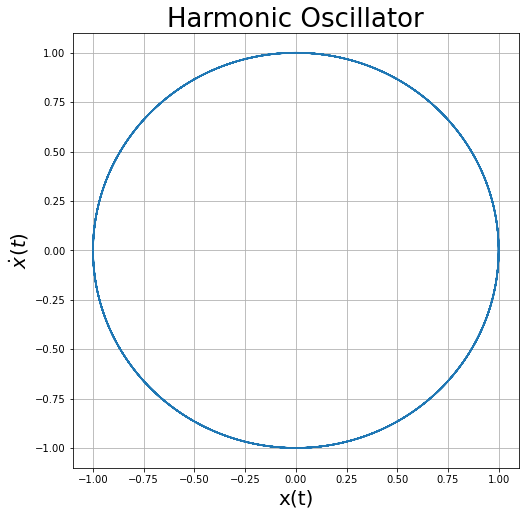

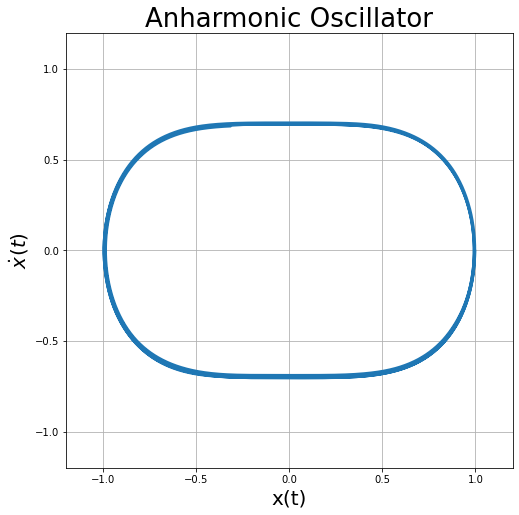

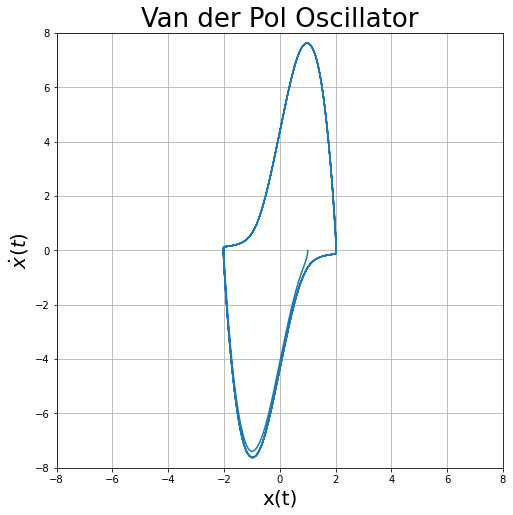

In [28]:
N = 10000

t0  = 0
t50 = 50
tpoints, dt = np.linspace(t0,t50,N,retstep=True)

x0 = 1
x0dot = 0

omega = 1
mu = 5
constants = (omega,mu)

def system_1(t,my_vars,args):
    omega  = args  
    x, psi = my_vars[0], my_vars[1]
    xdot   = psi
    psidot = -omega**2*x
    return xdot, psidot
    
def system_2(t,my_vars,args):
    omega  = args  
    x, psi = my_vars[0], my_vars[1]
    xdot   = psi
    psidot = -omega**2*x**3
    return xdot, psidot

def system_3(t,my_vars,args):
    omega,mu  = args  
    x, psi = my_vars[0], my_vars[1]
    xdot   = psi
    psidot = mu*(1-x**2)*psi-omega**2*x
    return xdot, psidot

solver1 = scipy.integrate.solve_ivp(system_1,[t0,t50],[x0,x0dot],method='RK45',t_eval=tpoints,args=(omega,))
solver2 = scipy.integrate.solve_ivp(system_2,[t0,t50],[x0,x0dot],method='RK45',t_eval=tpoints,args=(omega,))
solver3 = scipy.integrate.solve_ivp(system_3,[t0,t50],[x0,x0dot],method='RK45',t_eval=tpoints,args=(constants,))

print(solver1.message)
print(solver2.message)
print(solver3.message)

plt.figure(figsize=(8,8))
plt.plot(solver1.y[0], system_1(tpoints,(solver1.y[0],solver1.y[1]),omega)[0])
plt.ylabel(r"$\dotx(t)$",fontsize=20)
plt.xlabel("x(t)",fontsize=20)
plt.title('Harmonic Oscillator', fontsize=26)
plt.grid()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.plot(solver2.y[0], system_2(tpoints,(solver2.y[0],solver2.y[1]),omega)[0])
plt.ylabel(r"$\dotx(t)$",fontsize=20)
plt.xlabel("x(t)",fontsize=20)
plt.title('Anharmonic Oscillator', fontsize=26)
plt.grid()
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.plot(solver3.y[0], system_3(tpoints,(solver3.y[0],solver3.y[1]),constants)[0])
plt.ylabel(r"$\dotx(t)$",fontsize=20)
plt.xlabel("x(t)",fontsize=20)
plt.title('Van der Pol Oscillator', fontsize=26)
plt.grid()
plt.xlim(-8.,8.)
plt.ylim(-8.,8.)
plt.show()
plt.close()

#### Excercise 2

Comets travel in <a href="https://en.wikipedia.org/wiki/Comet#Orbital_characteristics">elongated orbits</a> around the sun, but the gravitational law is the same for comets as it is for planets. Assuming an orbit in a 2 dimensional plane, the equation of motion for the comet is
$$m\mathbf{\ddot{r}}=-\left(\frac{GMm}{r^2}\right)\frac{\mathbf{r}}{r}$$
where $\mathbf{r}=(x,y)$ and $r=\sqrt{x^2+y^2}$, and assuming there's nothing else in the solar system but the sun.

You are going to solve the resulting four first order equations for the orbit of a comet. The mass of the sun us $M=1.989\times10^{30}$ kg, and $G=6.674\times10^{-11}$ m<sup>3</sup>/kg/s<sup>2</sup>. Plot the orbit $x$ vs $y$.  As the initial condition, take the <a href="https://en.wikipedia.org/wiki/Apsis">aphelion</a> distance to be $4\times10^9$ km (around Neptune's orbit), and orient $x$ and $y$ such that this value is $x_0$ and $y_0=0$. Then the tangential velocity of the coment is $v_x=0$ and $v_y=500$ m/s.

- First, solve using fixed time steps. Simulate about 95 years in 1000 steps using `scipy.integrate.solve_ivp` and pass your time points array using the `t_eval` option. (Watch your units! All of your units should be in standard meters, kg, seconds.)

- Give a short description of your findings. What do you observe about the orbit? It will be helpful to plot the orbit with *dots and lines* so you can see where each time point falls.

- Next, solve let `scipy.integrate.solve_ivp` choose the time points. Simulate the same 95 years but ask for a relative and absolute accuracy of about 1,000 km at the aphelion, ie. `rtol` and `atol` should be `1E-6`.

- How has the orbit changed? Is the calculation stable, which means that becuase the equations are periodic, do successive orbits lie on top of each other?

### Solution:

Let $\dot{x}=\psi \;$ and $\; \dot{y}=\phi,$ then:
1.  $\dot{\psi}=-\left(\frac{GMx}{r^3}\right)$
2.  $\dot{\phi}=-\left(\frac{GMy}{r^3}\right)$ 

The solver successfully reached the end of the integration interval.


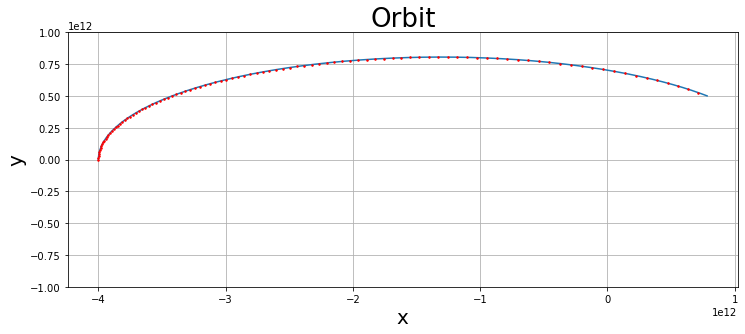

In [194]:
G     = 6.674*10**(-11)  # m^3*kg^(-1)*s^(-2)
M     = 1.989*10**30     # kg
aph   = 4.*10**(12)      # m

constants = (G,M,aph)

x0    = -aph             # m
y0    = 0.               # m
x0dot = 0.               # m*s^(-1)
y0dot = 500.             # m*s^(-1)

t0  = 0                  # s
t95 = 2.997972*10**(9)   # s (95*365.25*24*60*60) 95 years in seconds

N   = 1000
tpoints, dt = np.linspace(t0,t95,N,retstep=True)

def orbit_sys(t,my_vars,args):
    G, M, aph  = args
    x, y       = my_vars[0], my_vars[1] 
    psi, phi   = my_vars[2], my_vars[3]
    psidot     = -(G*M*x)/(((aph-x)**2+y**2)**(3/2))
    phidot     = -(G*M*y)/(((aph-x)**2+y**2)**(3/2))
    return psi, phi, psidot, phidot


solver = scipy.integrate.solve_ivp(orbit_sys,[t0,t95],[x0,y0,x0dot,y0dot],method='RK45',t_eval=tpoints,args=(constants,))

print(solver.message)
#print(solver.y[2])

plt.figure(figsize=(12,12))
plt.plot(solver.y[0], solver.y[1],'-')
plt.plot(solver.y[0][::10], solver.y[1][::10],'r.',markersize=3)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.title('Orbit', fontsize=26)
plt.ylim(-10**12,10**12)
plt.gca().set_aspect('equal')
plt.grid()
plt.show()
plt.close()

<font color="blue">Answer:</font>  By plotting only 100 points and using a dot marker, it can be seen that as x increases so does the space between consecutive points. This implies that the velocity in both the x and y directions are increasing and reach a maximum (about 2850 m/s for x and -1500 m/s for y) close to the opposite end of the orbit. This observation can also be verified by checking the two velocity arrays in the solver. Qualitatively, this means that the comet travels relatively slowly around the aphelion, gradually speeds up until it is flying very quickly around the perihelion and then slows down as it approaches the aphelion once again.

The solver successfully reached the end of the integration interval.
The solver used 24 points.


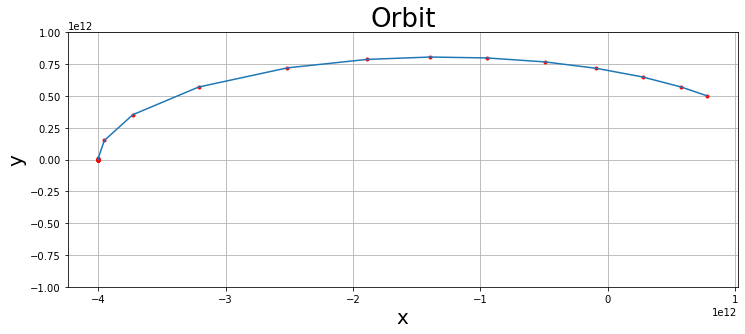

In [190]:
solver = scipy.integrate.solve_ivp(orbit_sys,[t0,t95],[x0,y0,x0dot,y0dot],method='RK45',args=(constants,),rtol=1e-6,atol=1e-6)

print(solver.message)
print('The solver used '+ str(solver.y[0].size) + ' points.')

plt.figure(figsize=(12,12))
plt.plot(solver.y[0], solver.y[1],'r.')
plt.plot(solver.y[0], solver.y[1],'-')
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.title('Orbit', fontsize=26)
plt.ylim(-10**12,10**12)
plt.gca().set_aspect('equal')
plt.grid()
plt.show()
plt.close()

<font color="blue">Answer:</font> The orbit is largely the same but a little less accurate since it uses fewer points. This is most noticeable at the start where the curve is not very smooth. No, the calculation is not stable since if the time interval is increased past 95 years so that multiple laps around the aphelion occur then the successive orbits do not lie on top of one another. 

#### Excercise 3
Atoms $i$ and $j$ are both elemental argon. Being noble gases, they cannot form a covalent bond. But quanutm mechanics says they do interact with each other. We can use the Lennard-Jones potential, a mathematically simple model that approximates the interaction between a pair of neutral atoms:
$$ V(x_{ij})=\frac{a_{ij}}{x_{ij}^{12}}-\frac{b_{ij}}{x_{ij}^{6}}$$
For two argon atoms, typical vaues would be $a=2.266\times10^{-6}$ kcal nm<sup>12</sup>/mol, and $b=1.467\times10^{-3}$  kcal nm<sup>6</sup>/mol

- Make a properly labeled plot for this potential, showing clearly the region where $V(x_{ij})$ drops below 0. I suggest plotting the energy in units of J/mol, and the range of $x$ from 0.32 to 1 nm.
  
The motion of one atom, trapped in the potential well of the LJ potential is given by the equations of motion 
$$m\ddot{x} = -\frac{\partial V}{\partial x}.$$

- Use the Verlet method to solve for the motion of the argon atoms from $t=0\rightarrow 10\times10^{-12}$ seconds (10 picoseconds) in $N=1000$ steps. Let the inital value of the position to be $x_0=0.4$ nm, and the inital velocity be $v_0=0.01$ nm/sec. The mass of argon is 39.948 g/mol. In fact, if you use standard units except for distance in nm, it should work out perfectly.

- Plot the kinetic, potential, and total energy and determine the total energy drift.

$$ Let \;\; \dot{x}=\psi \;\;\;\;\; then: \;\;\; \dot{\psi}=-\frac{\partial V}{\partial x}\cdot \frac{1}{m}$$


0.009999999999307846


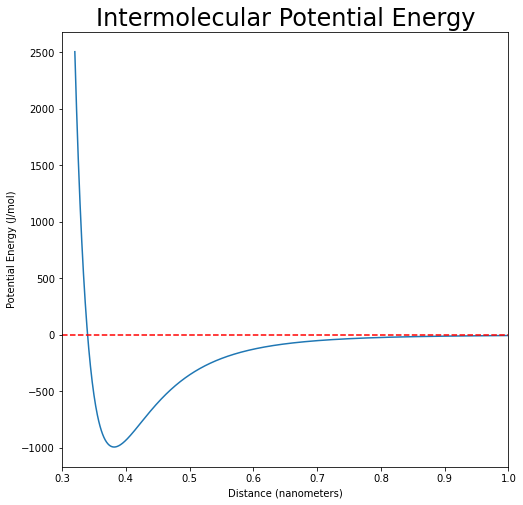

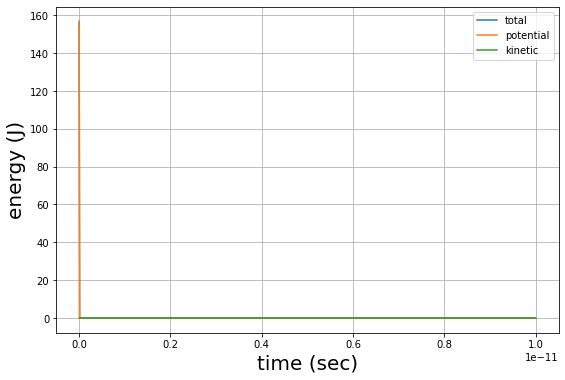

LinregressResult(slope=-1.3803948238579071, intercept=1.0678185331462187, rvalue=-0.054744890145136046, pvalue=0.08357349508685144, stderr=0.7969713231423265)


In [267]:
N   = 1000

t0  = 0.                    # s
t10 = 10**(-11)             # s

t_vals, dt = np.linspace(t0,t10,N,retstep=True)
x_vals, dx = np.linspace(0.32,1.,N,retstep=True)

a   = 2.266*10**(-6)*4184   # J*10^(-9)*m/mol   ( 1 kcal = 4184 J)
b   = 1.467*10**(-3)*4184   # J*10^(-9)*m/mol
m   = 39.948                # g/mol
vrs = (a,b,m)

x0  = 0.4                   # 10^(-9) m (nanometers)
v0  = 0.01                  # 10^(-9) m * s^(-1)
g   = 9.81                  # m*s^(-2)

xpoints      = np.zeros(N, dtype=float)
psipoints    = np.zeros(N, dtype=float)
xpoints[0]   = x0
psipoints[0] = v0

def V(x, args):
    a, b, m = args
    return a/(x**12) - b/(x**6)

def ddotx(x, t, args):
    a, b, m = args
    dVdx = -12*a/(x**13) + 6*b/(x**7)
    return -dVdx*(1/m)

    
ke = 0.5*m*psipoints**2   # 0.5mv^2
pe = m*g*xpoints          # mgh

for i in range(N-1):
    psi_ht = psipoints[i]+0.5*dt*ddotx(xpoints[i],t_vals[i],vrs)
    xpoints[i+1] = xpoints[i]+psi_ht*dt
    psipoints[i+1] = psi_ht+0.5*dt*ddotx(xpoints[i+1],t_vals[i+1],vrs)
    
# intermolecular potential graph

plt.figure(figsize=(8,8))
plt.plot(x_vals,V(x_vals,vrs))
plt.plot(np.linspace(0.3,1.,100),np.zeros(100),'r--')
plt.xlim(0.3,1.)
plt.xlabel('Distance (nanometers)')
plt.ylabel('Potential Energy (J/mol)')
plt.title('Intermolecular Potential Energy',fontsize=24)

# Second graph

plt.figure(figsize=(9,6))
plt.plot(t_vals,ke+pe, label="total")
plt.plot(t_vals,pe, label="potential")
plt.plot(t_vals,ke, label="kinetic")
plt.xlabel("time (sec)",fontsize=20)
plt.ylabel("energy (J)",fontsize=20)
plt.legend()
plt.grid()
plt.show()
plt.close()
    
print(scipy.stats.linregress(x_vals,ke+pe))

 <font color="blue"> Answer:</font>
 